## Random Forest Algorithm

### What Is Random Forest?

- Random forest is a machine learning algorithm that creates an ensemble of multiple decision trees to reach a singular, more accurate prediction or result.

- In simple word, random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.

### Advantage
- One big advantage of random forest is that it can be used for both classification and regression problems, which form the majority of current machine learning systems.


Let’s look at random forest in classification, since classification is sometimes considered the building block of machine learning. Below you can see how a random forest model would look like with two trees:

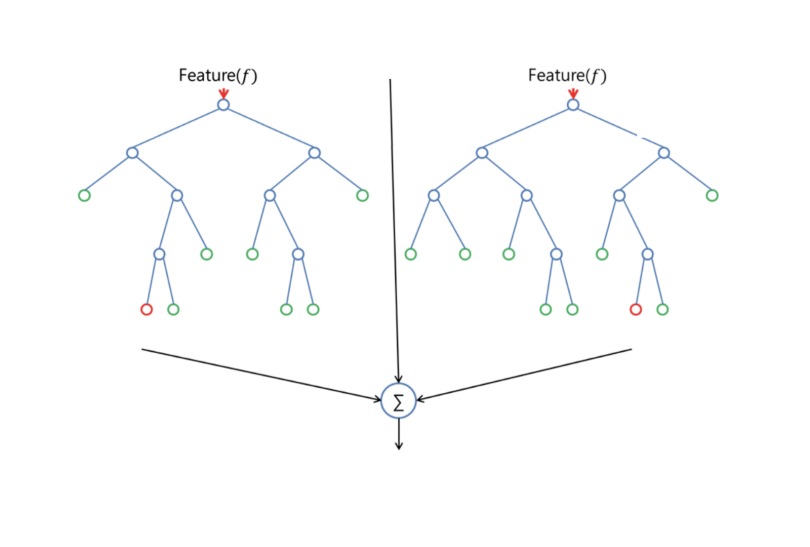

### A Real-Life Example of Random Forest

Andrew wants to decide where to go during his one-year vacation, so he asks the people who know him best for suggestions. The first friend he seeks out asks him about the likes and dislikes of his past travels. Based on the answers, he will give Andrew some advice.

This is a typical decision tree algorithm approach. Andrew’s friend created rules to guide his decision about what he should recommend, by using Andrew’s answers. 

Afterward, Andrew starts asking more and more of his friends to advise him and they again ask him different questions they can use to derive some recommendations from. Finally, Andrew chooses the places that his friends recommend the most to him, which is the typical random forest algorithm approach.

### I am going to work on sklearn hand-written datasets for this task.

In [2]:
# libraries
import pandas as pd
from sklearn.datasets import load_digits

digits = load_digits()


In [3]:
# Properties of digits.
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

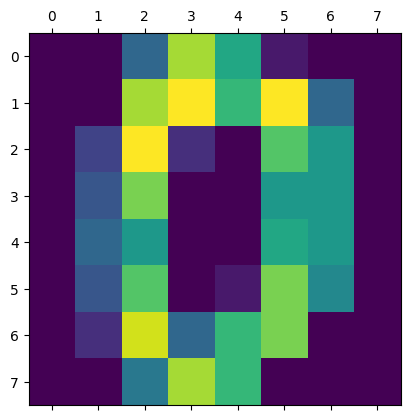

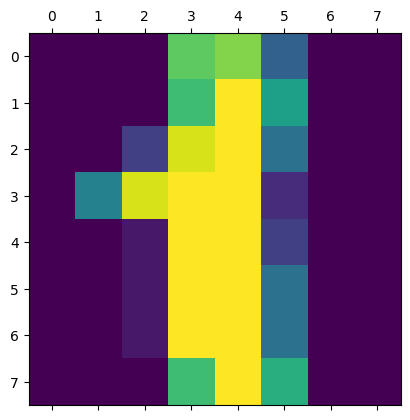

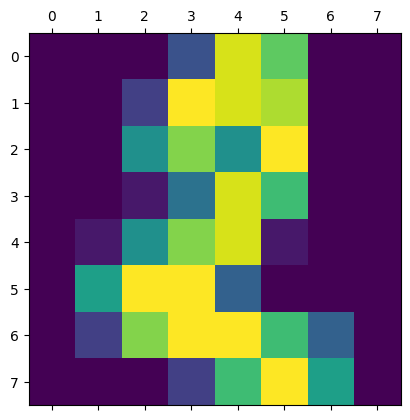

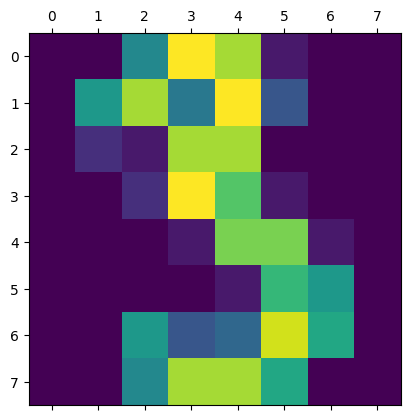

In [5]:
# print some hand-written digits
import matplotlib.pyplot as plt

for i in range(4):
    plt.matshow(digits.images[i])

In [9]:
digits.data[:5]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [11]:
# Make a dataframe from digits's data

df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [12]:
# length of dataset
len(df)

1797

In [13]:
# Let's see target variable in digith, targets are what we need to predict.

digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [15]:
# Append target in dataset
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [17]:
# import sklearn
from sklearn.model_selection import train_test_split

x = df.drop('target', axis=1)
y = df['target']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
x_train


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
1734,0.0,0.0,3.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,...,11.0,0.0,0.0,0.0,3.0,11.0,16.0,13.0,4.0,0.0
855,0.0,0.0,9.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,16.0,14.0,3.0,0.0,0.0
1642,0.0,0.0,0.0,10.0,13.0,3.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.0,11.0,13.0,6.0,0.0,0.0
175,0.0,1.0,10.0,16.0,16.0,11.0,0.0,0.0,0.0,5.0,...,4.0,0.0,0.0,1.0,15.0,14.0,11.0,4.0,0.0,0.0
925,0.0,0.0,6.0,14.0,13.0,3.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,4.0,15.0,16.0,9.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.0,1.0,13.0,16.0,16.0,12.0,1.0,0.0,0.0,12.0,...,9.0,0.0,0.0,1.0,14.0,16.0,16.0,11.0,1.0,0.0
1294,0.0,3.0,15.0,16.0,15.0,3.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,3.0,16.0,5.0,0.0,0.0,0.0,0.0
860,0.0,0.0,9.0,16.0,16.0,13.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.0,14.0,16.0,16.0,2.0,0.0
1459,0.0,0.0,1.0,13.0,16.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,15.0,7.0,0.0,0.0,0.0


In [21]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
1245,0.0,0.0,0.0,7.0,12.0,0.0,0.0,0.0,0.0,0.0,...,16.0,2.0,0.0,0.0,0.0,9.0,14.0,14.0,5.0,0.0
220,0.0,0.0,11.0,16.0,8.0,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,13.0,16.0,11.0,1.0,0.0,0.0
1518,0.0,0.0,8.0,15.0,12.0,4.0,0.0,0.0,0.0,5.0,...,7.0,0.0,0.0,0.0,13.0,16.0,15.0,8.0,0.0,0.0
438,0.0,0.0,2.0,12.0,12.0,12.0,9.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,15.0,3.0,0.0,0.0,0.0
1270,0.0,2.0,13.0,16.0,10.0,0.0,0.0,0.0,0.0,6.0,...,14.0,0.0,0.0,3.0,15.0,16.0,16.0,10.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,0.0,0.0,0.0,2.0,14.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,10.0,0.0,0.0,0.0
1630,0.0,0.0,6.0,16.0,15.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,16.0,16.0,12.0,1.0,0.0
1037,0.0,0.0,7.0,15.0,16.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,11.0,10.0,10.0,0.0,0.0
965,0.0,0.0,7.0,16.0,12.0,1.0,0.0,0.0,0.0,0.0,...,14.0,0.0,0.0,0.0,7.0,16.0,16.0,16.0,4.0,0.0


In [23]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(x_train, y_train)

RandomForestClassifier()

In [24]:
# Accuracy of the model

model.score(x_test, y_test)

0.9777777777777777

In [26]:
y_pred = model.predict(x_test)


y_pred

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 4, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 7, 7, 2, 9, 0, 4, 5, 8, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 1, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 8, 8, 5,
       5, 1, 5, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm


array([[32,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 29,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 39]])

Text(95.72222222222221, 0.5, 'Actual output')

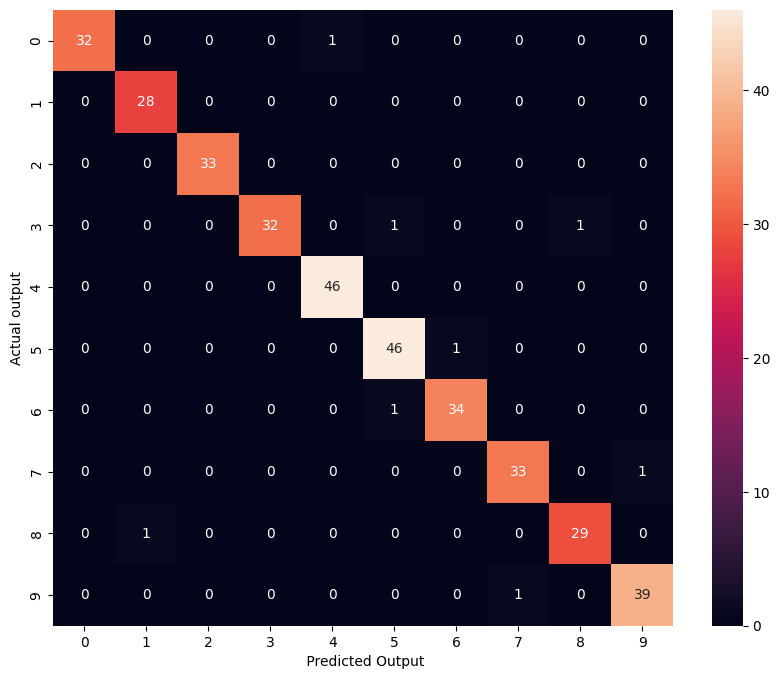

In [29]:
# Visualize Confusion matrix

import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True)
plt.xlabel(' Predicted Output')
plt.ylabel('Actual output')